# Importing Libraries

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

# Loading the csv file

In [2]:
#importing the file from github
df=pd.read_csv(r"C:\Users\Hanish\Desktop\prop\train.csv")
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [3]:
df.shape

(4599, 10)

In [4]:
df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [5]:
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [6]:
#checking unique value for every column
df.apply(lambda x: len(x.unique()))

ID                         4599
Estimated_Insects_Count      71
Crop_Type                     2
Soil_Type                     2
Pesticide_Use_Category        3
Number_Doses_Week            20
Number_Weeks_Used            64
Number_Weeks_Quit            47
Season                        3
Crop_Damage                   3
dtype: int64

# EDA

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

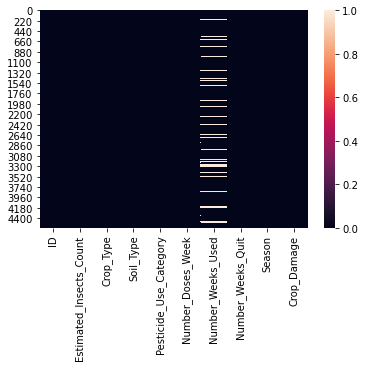

In [8]:
sns.heatmap(df.isnull())

# Univariate Analysis

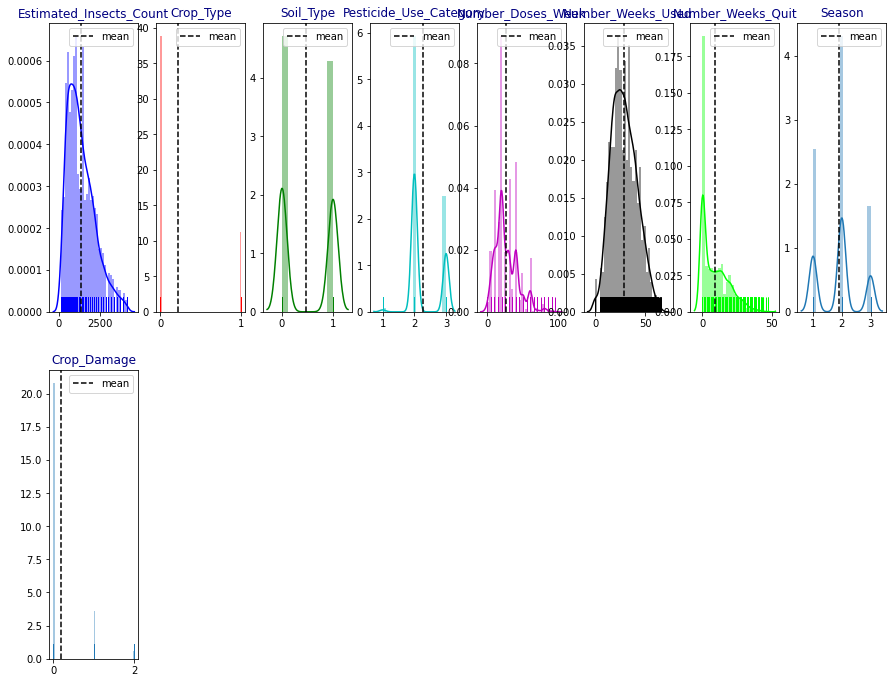

In [9]:
import itertools
cols=['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage']
length=len(cols)
cs=["b","r","g","c","m","k","lime"]
fig=plt.figure(figsize=(15,50))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(8,8,j+1)
    ax=sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

In [10]:
for col in['Number_Weeks_Used']:
    df[col].fillna(df[col].median(), inplace=True) 

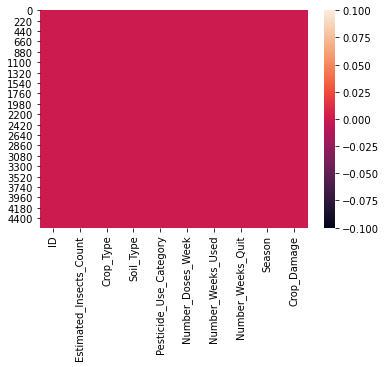

In [11]:
sns.heatmap(df.isnull())

# Multivariate Analysis

In [12]:
df.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.428238,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.002036,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.093690,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.367823,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.099903,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,0.428238,-0.002036,-0.093690,0.367823,0.099903,1.000000,-0.445483,-0.010814,0.231439
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.445483,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.010814,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.231439,-0.152918,-0.016196,1.000000


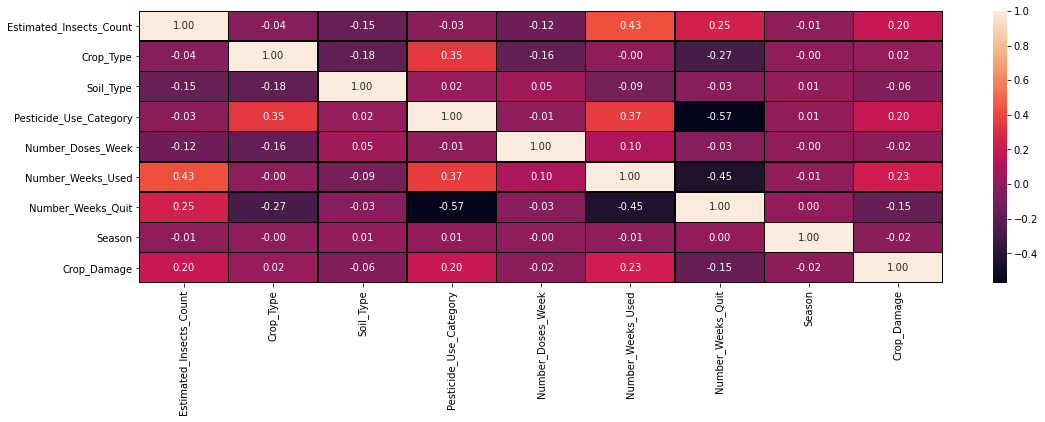

In [13]:
plt.figure(figsize=(18,5))
sns.heatmap(df.corr(),annot=True, linewidth=0.5, linecolor="black",fmt='.2f')

In [14]:
df.drop(['ID'],axis=1,inplace=True)

In [15]:
df

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...
4594,2138,0,1,2,20,28.0,1,1,1
4595,2139,0,1,2,30,47.0,2,1,1
4596,2267,0,1,2,10,7.0,27,2,0
4597,2267,0,1,2,10,20.0,24,2,0


In [16]:
#removing outliers
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df))
z


array([[1.44286807, 1.85681868, 0.95429408, ..., 0.94782668, 1.28702725,
        0.42765624],
       [1.41708065, 1.85681868, 0.95429408, ..., 0.94782668, 0.15207762,
        1.77233374],
       [1.35813798, 1.85681868, 0.95429408, ..., 0.94782668, 0.15207762,
        1.77233374],
       ...,
       [1.11008649, 0.53855555, 1.04789501, ..., 1.83218282, 0.15207762,
        0.42765624],
       [1.11008649, 0.53855555, 1.04789501, ..., 1.52329287, 0.15207762,
        0.42765624],
       [1.11008649, 0.53855555, 1.04789501, ..., 0.80254967, 0.15207762,
        0.42765624]])

In [17]:
train=df[(z<3).all(axis=1)]

In [18]:
train

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...
4594,2138,0,1,2,20,28.0,1,1,1
4595,2139,0,1,2,30,47.0,2,1,1
4596,2267,0,1,2,10,7.0,27,2,0
4597,2267,0,1,2,10,20.0,24,2,0


In [19]:
percentage_loss=((4599-4370)/4599)*100
percentage_loss

4.979343335507719

# Preparing dataset for model Training(Regression)

In [20]:
x=df.drop('Crop_Damage',axis=1)
y=df['Crop_Damage']

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [22]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=43,test_size=0.22)
 

In [23]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.6442687747035574
[[612 148 101]
 [ 65  30  28]
 [ 12   6  10]]
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       861
           1       0.16      0.24      0.20       123
           2       0.07      0.36      0.12        28

    accuracy                           0.64      1012
   macro avg       0.37      0.44      0.37      1012
weighted avg       0.78      0.64      0.70      1012



In [24]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8507905138339921
[[861   0   0]
 [123   0   0]
 [ 28   0   0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       861
           1       0.00      0.00      0.00       123
           2       0.00      0.00      0.00        28

    accuracy                           0.85      1012
   macro avg       0.28      0.33      0.31      1012
weighted avg       0.72      0.85      0.78      1012



In [25]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7272727272727273
[[704 143  14]
 [ 85  31   7]
 [ 20   7   1]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       861
           1       0.17      0.25      0.20       123
           2       0.05      0.04      0.04        28

    accuracy                           0.73      1012
   macro avg       0.36      0.37      0.36      1012
weighted avg       0.76      0.73      0.74      1012



In [26]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8507905138339921
[[861   0   0]
 [123   0   0]
 [ 28   0   0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       861
           1       0.00      0.00      0.00       123
           2       0.00      0.00      0.00        28

    accuracy                           0.85      1012
   macro avg       0.28      0.33      0.31      1012
weighted avg       0.72      0.85      0.78      1012



In [27]:
#k=10
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8330039525691699
[[826  34   1]
 [106  17   0]
 [ 23   5   0]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       861
           1       0.30      0.14      0.19       123
           2       0.00      0.00      0.00        28

    accuracy                           0.83      1012
   macro avg       0.39      0.37      0.37      1012
weighted avg       0.77      0.83      0.80      1012



In [28]:
from sklearn.model_selection import GridSearchCV 

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
'kernel': ['rbf']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
grid.fit(x_train, y_train) 


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.825, total=   1.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.825, total=   1.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.826, total=   1.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.826, total=   1.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.824, total=   1.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.825, total=   1.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.825, total=   1.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.826, total=   1.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.826, total=   1.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  1.7min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [29]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 


{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1, gamma=0.0001)


In [30]:
grid_predictions = grid.predict(x_test) 

# print classification report 
print(classification_report(y_test, grid_predictions)) 


              precision    recall  f1-score   support

           0       0.85      0.99      0.92       861
           1       0.20      0.02      0.03       123
           2       0.00      0.00      0.00        28

    accuracy                           0.85      1012
   macro avg       0.35      0.34      0.32      1012
weighted avg       0.75      0.85      0.78      1012



In [31]:
import pickle
filename ='AgriTrain.pkl'
pickle.dump(grid,open(filename,'wb'))

# Using the test Dataset

In [32]:
test_df=pd.read_csv(r"C:\Users\Hanish\Desktop\prop\test.csv")
test_df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


In [33]:
test_df.shape

(1199, 9)

In [34]:
test_df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season'],
      dtype='object')

In [35]:
#checking unique value for every column
test_df.apply(lambda x: len(x.unique()))

ID                         1199
Estimated_Insects_Count      70
Crop_Type                     2
Soil_Type                     2
Pesticide_Use_Category        3
Number_Doses_Week            18
Number_Weeks_Used            59
Number_Weeks_Quit            42
Season                        3
dtype: int64

# EDA

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

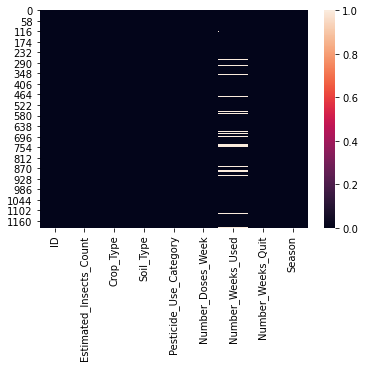

In [37]:
sns.heatmap(test_df.isnull())

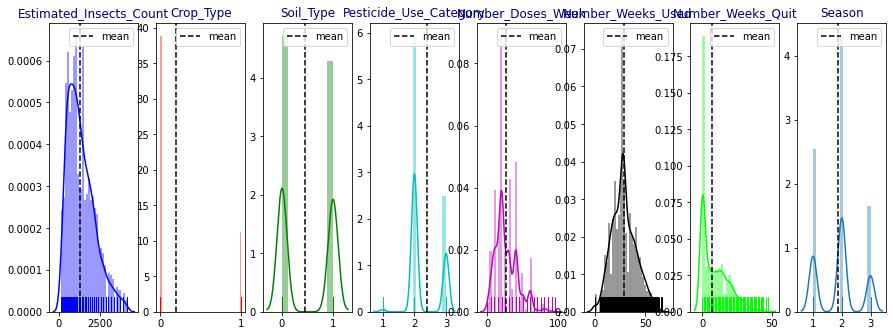

In [39]:
import itertools
cols=[  'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season']
length=len(cols)
cs=["b","r","g","c","m","k","lime"]
fig=plt.figure(figsize=(15,50))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(8,8,j+1)
    ax=sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(test_df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

In [40]:
for col in['Number_Weeks_Used']:
    test_df[col].fillna(df[col].median(), inplace=True) 

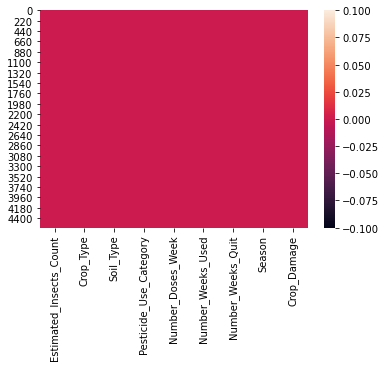

In [41]:
sns.heatmap(df.isnull())

In [42]:
test_df.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
Estimated_Insects_Count,1.000000,0.020773,-0.339516,0.038259,-0.121168,0.490493,0.146441,0.023384
Crop_Type,0.020773,1.000000,0.063050,0.482378,-0.170014,0.062234,-0.390935,0.020282
Soil_Type,-0.339516,0.063050,1.000000,0.129857,0.057118,-0.138099,-0.191989,-0.069242
Pesticide_Use_Category,0.038259,0.482378,0.129857,1.000000,-0.010922,0.405977,-0.584312,0.015085
Number_Doses_Week,-0.121168,-0.170014,0.057118,-0.010922,1.000000,0.122230,0.009077,0.027197
Number_Weeks_Used,0.490493,0.062234,-0.138099,0.405977,0.122230,1.000000,-0.362077,0.017875
Number_Weeks_Quit,0.146441,-0.390935,-0.191989,-0.584312,0.009077,-0.362077,1.000000,0.030281
Season,0.023384,0.020282,-0.069242,0.015085,0.027197,0.017875,0.030281,1.000000


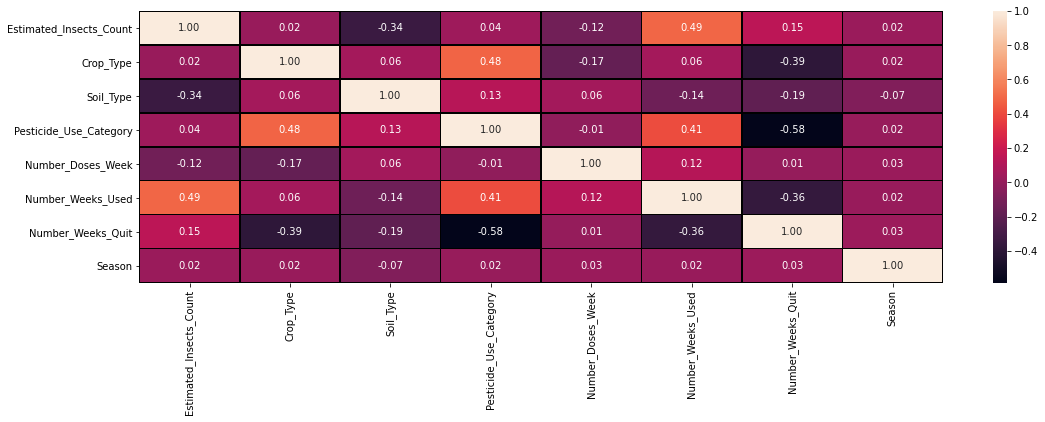

In [43]:
plt.figure(figsize=(18,5))
sns.heatmap(test_df.corr(),annot=True, linewidth=0.5, linecolor="black",fmt='.2f')

In [44]:
test_df.drop(['ID'],axis=1,inplace=True)

In [45]:
#removing outliers
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(test_df))
z


array([[1.30318366, 2.03615391, 1.09360445, ..., 0.07673638, 0.7960038 ,
        0.17280413],
       [1.04035366, 2.03615391, 1.09360445, ..., 2.38515371, 0.7960038 ,
        0.17280413],
       [0.78462718, 2.03615391, 0.9144074 , ..., 2.38515371, 0.7960038 ,
        0.17280413],
       ...,
       [0.18556423, 0.49112201, 1.09360445, ..., 1.31338852, 1.79995135,
        1.28629553],
       [0.09085072, 0.49112201, 1.09360445, ..., 0.50036795, 0.23166572,
        1.28629553],
       [0.09085072, 0.49112201, 1.09360445, ..., 0.07673638, 1.4613485 ,
        1.63190379]])

In [46]:
test=test_df[(z<3).all(axis=1)]

In [47]:
test

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,28.0,0,2
1,410,1,1,1,0,0.0,0,2
2,626,1,0,1,0,0.0,0,2
3,731,1,0,1,0,0.0,0,2
4,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...
1194,1132,0,1,2,40,34.0,7,3
1195,1132,0,1,2,40,25.0,3,1
1196,1132,0,1,2,20,13.0,23,1
1197,1212,0,1,2,10,35.0,5,1


In [48]:
percentage_loss=((1199-1160)/1199)*100
percentage_loss

3.252710592160134

In [49]:
fitted_model=pickle.load(open("AgriTrain.pkl","rb"))

In [50]:
fitted_model

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [51]:
predictions=fitted_model.predict(test)

In [52]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
print(predictions)

[0 0 0 ... 0 0 0]


In [54]:
dfpd = pd.DataFrame(predictions, columns = ['ouput'])

In [57]:
#checking unique value for every column
dfpd.apply(lambda x: len(x.unique()))

ouput    2
dtype: int64

In [58]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(dfpd)

      ouput
0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
31        0
32        0
33        0
34        0
35        0
36        0
37        0
38        0
39        0
40        0
41        0
42        0
43        0
44        0
45        0
46        0
47        0
48        0
49        0
50        0
51        0
52        0
53        0
54        0
55        0
56        0
57        0
58        0
59        0
60        0
61        0
62        0
63        0
64        0
65        0
66        0
67        0
68        0
69        0
70        0
71        0
72        0
73        0
74        0
75        0
76        0
77        0
78        0
79        0
80        0
81        0
82  